[[3. 0. 0. 0. ... 0. 0. 0. 0.]
 [0. 2. 0. 0. ... 0. 0. 0. 0.]
 [0. 0. 2. 0. ... 0. 0. 0. 0.]
 [0. 0. 0. 3. ... 0. 0. 0. 0.]
 [0. 0. 0. 0. ... 0. 0. 0. 0.]]


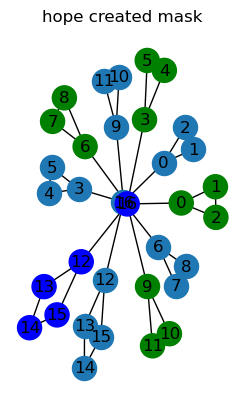

In [8]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from numpy import set_printoptions
from utils import *

set_printoptions(precision=3, threshold=5, edgeitems=4, suppress=True)

N_Triangle = 4
N_Rec = 1
TriStart = 0 
TriNodes = [[3 * i , 3 * i + 1, 3 * i + 2] for i in range(N_Triangle)]
RecStart = N_Triangle * 3 
RecNodes = [[RecStart + 4 * i , RecStart + 4 * i + 1, RecStart + 4 * i + 2 , RecStart + 4 * i + 3] for i in range(N_Rec)]

center = N_Triangle * 3 + N_Rec * 4
A = np.eye(center + 1 ) * 0
D = np.eye(center + 1) * 2
x = []
edges = []
for trin in TriNodes:
    edges.append([trin[0], trin[1]])
    edges.append([trin[1], trin[2]])
    edges.append([trin[0], trin[2]])
    edges.append([trin[0], center ])
    D[trin[0]][trin[0]] = 3
    x.append(1)
    x.append(1)
    x.append(1)

for trin in RecNodes:
    edges.append([trin[0], trin[1]])
    edges.append([trin[1], trin[2]])
    edges.append([trin[3], trin[2]])
    edges.append([trin[0], trin[3]])
    edges.append([trin[0], center ])
    D[trin[0]][trin[0]] = 3
    x.append(0)
    x.append(0)
    x.append(0)
    x.append(0)
x.append(0)




for edge in edges:
    n1, n2 = edge[0], edge[1]
    A[n1][n2] = 1
    A[n2][n1] = 1
G = nx.from_numpy_matrix(A)
subax1 = plt.subplot(121)
nx.draw(G,  with_labels=True)   # default spring_layout
print(D[:5][:5])

color_map = []
for i, node in enumerate(G):
    if x[i]  == 1:
        color_map.append('green')
    else: 
        color_map.append('blue')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.title('hope created mask')
plt.show()

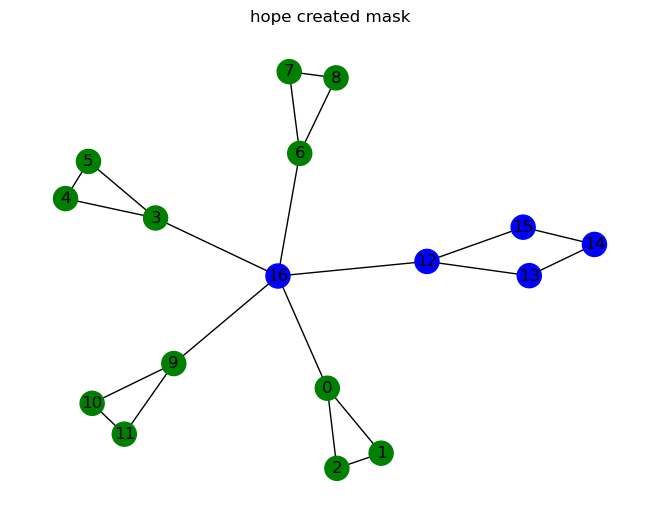

In [9]:


color_map = []
for i, node in enumerate(G):
    if x[i]  == 1:
        color_map.append('green')
    else: 
        color_map.append('blue')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.title('hope created mask')
plt.show()



In [10]:

L = D - A
lambdas , U = np.linalg.eig(L)
print(L)
idx = lambdas.argsort()[::-1]   
lambdas = lambdas[idx]
U = U[:,idx]
print(lambdas)
print(U)


[[ 3. -1. -1.  0. ...  0.  0.  0. -1.]
 [-1.  2. -1.  0. ...  0.  0.  0.  0.]
 [-1. -1.  2.  0. ...  0.  0.  0.  0.]
 [ 0.  0.  0.  3. ...  0.  0.  0. -1.]
 ...
 [ 0.  0.  0.  0. ...  2. -1.  0.  0.]
 [ 0.  0.  0.  0. ... -1.  2. -1.  0.]
 [ 0.  0.  0.  0. ...  0. -1.  2.  0.]
 [-1.  0.  0. -1. ...  0.  0.  0.  2.]]
[ 5.146  4.242  3.732  3.732 ...  0.268  0.268  0.198 -0.429]
[[ 0.327 -0.212 -0.769 -0.034 ... -0.097 -0.055  0.096  0.269]
 [-0.079  0.065  0.282  0.012 ... -0.133 -0.076  0.12   0.188]
 [-0.079  0.065  0.282  0.012 ... -0.133 -0.076  0.12   0.188]
 [ 0.327 -0.212  0.256  0.734 ...  0.153  0.347  0.096  0.269]
 ...
 [-0.161 -0.408  0.     0.    ...  0.     0.    -0.478  0.156]
 [ 0.102  0.364 -0.     0.    ...  0.    -0.    -0.531  0.128]
 [-0.161 -0.408  0.    -0.    ...  0.    -0.    -0.478  0.156]
 [-0.545  0.132 -0.    -0.    ... -0.    -0.     0.029  0.546]]


[ True  True False False ... False False  True  True]
the 0 eigenvector * 0.6776988116402702


the 1 eigenvector * -0.3245689413052531


the 9 eigenvector * 0.11304538347729307


the 11 eigenvector * 1.7166181749750449


the 15 eigenvector * 1.3411773917124945


the 16 eigenvector * 2.584001801396516


[1.0000000000000016, 1.0, 1.0000000000000004, 0.999999999999997, 0.9999999999999972, 0.999999999999999, 1.0000000000000027, 1.0000000000000038, 1.0000000000000038, 0.9999999999999987, 0.999999999999998, 0.9999999999999979, -1.4432899320127035e-15, -4.440892098500626e-16, 3.3306690738754696e-16, -8.881784197001252e-16, 6.661338147750939e-16]


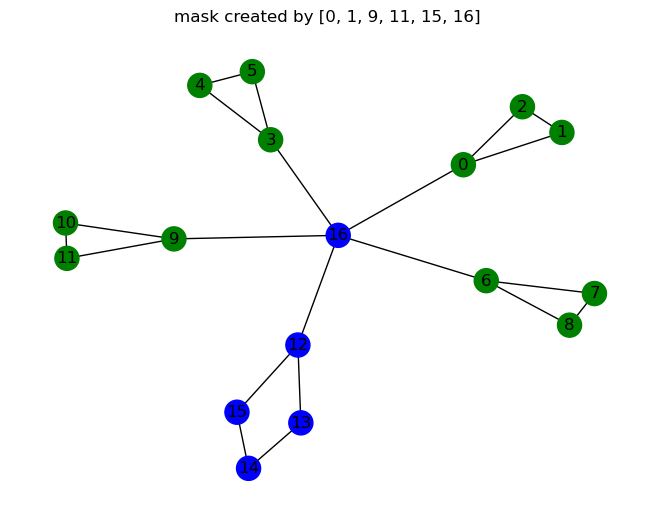

In [14]:
x = np.array(x).reshape(center + 1, 1)
output = U.T @ x
print(np.abs(output.reshape(-1)) > 0.0001)
# print(  output.reshape(-1).tolist())
output = output.reshape(-1).tolist()
created_mask = 0
used_vectors = []
for i in range(len(output)):
    if np.abs(output[i]) > 0.0000001:
        print(f'the {i} eigenvector * {output[i]}')
        created_mask = created_mask + output[i] * U[:, i]
        used_vectors.append(i)
        eiventor = U[:, i].tolist()
        label_values = [gg for gg in eiventor]
        draw_color(label_values, G, n_node = center, title= f'the {i}-th eigen vector')
created_mask = created_mask.tolist()

print(created_mask)
color_map = []
for i, node in enumerate(G):
    if created_mask[i]  > 0.9:
        color_map.append('green')
    else: 
        color_map.append('blue')  
nx.draw(G, node_color=color_map, with_labels=True)
plt.title(f'mask created by {used_vectors} ')
plt.show()


In [12]:

label_values = [gg[0] for gg in x]

draw_color(label_values, G, n_node = center)


In [13]:
for i in range(center + 1):
     eiventor = U[:, i].tolist()
     label_values = [gg for gg in eiventor]

     draw_color(label_values, G, n_node = center, title= f'the {i}-th eigen vector')
